<a href="https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Explainable-AI-II/blob/main/AIPI_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06
### Description

This project explores **Explainable AI (XAI)** techniques to interpret a machine learning model trained on the **Forest Cover dataset**. It includes creating **Partial Dependence Plots (PDP)**, **Individual Conditional Expectation (ICE) plots**, and **Accumulated Local Effects (ALE) plots** to visualize the impact of key features like elevation, aspect, and proximity to roadways on forest cover type predictions. Additionally, **permutation feature importance** is used to identify the most influential features, highlighting the significance of geographic and spatial attributes. The model is evaluated with metrics such as **R²** and **Mean Squared Error (MSE)** to assess predictive accuracy and interpretability, providing insights for improved forest cover classification.
### Yufan Ai

#### Include the button below. Change the link to the location in your github repository:
#### https://github.com/aiyufan3/AIPI-XAI-Explainable-AI-II

## DO:
For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features.  



Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.


In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


# Install and Import Libraries

In [2]:
# Install libraries
!pip install numpy pandas matplotlib scikit-learn shap xgboost git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
# Install datasets from hugginface
!pip install datasets

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from alepython import ale_plot
from sklearn.inspection import permutation_importance

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-e5yylkjd/alepython_718e33158f2544519a1c2a11f1dae069
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-e5yylkjd/alepython_718e33158f2544519a1c2a11f1dae069
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=19261db8c6e967e8652cbdcb71359b885ba2587bddf65213507fa9bdc4c22aa7
  Stored in directory: /tmp/pip-ephem-wheel-cache-m0yyna0a/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3

# Load Dataset and Prepare for Modeling

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset from OpenML
forest_cover = fetch_openml(name="covertype", version=1, as_frame=True)
X = forest_cover.data

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(forest_cover.target)  # Convert string labels to numerical
print(forest_cover)

{'data':         elevation  aspect  slope  horizontal_distance_to_hydrology  \
0            2754     146      5                               150   
1            3219      21      8                                67   
2            2965     337     16                                42   
3            2368      14     15                               150   
4            2366     165      3                               390   
...           ...     ...    ...                               ...   
110388       2314     237     17                               390   
110389       2288     184      4                                 0   
110390       2232     141     32                                85   
110391       2221     163     27                                 0   
110392       2221     150     33                               170   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    2                             1790   


In [8]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Display Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8720956565061824
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.43      0.54       497
           1       0.61      0.28      0.38       287
           2       0.79      0.64      0.71       793
           3       0.86      0.73      0.79       906
           4       0.87      0.94      0.90     10374
           5       0.83      0.84      0.84      1410
           6       0.90      0.88      0.89      7812

    accuracy                           0.87     22079
   macro avg       0.80      0.68      0.72     22079
weighted avg       0.87      0.87      0.87     22079



In [54]:
# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
import pandas as pd


print("First few rows of the dataset:")
print(X.head())
print("\nDataset shape:", X.shape)
print("Unique cover types:", pd.Series(y).nunique()) # Convert y to Pandas Series before using nunique()

First few rows of the dataset:
   elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2754     146      5                               150   
1       3219      21      8                                67   
2       2965     337     16                                42   
3       2368      14     15                               150   
4       2366     165      3                               390   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               2                             1790   
1                              -1                             2869   
2                               7                             4288   
3                              65                             1006   
4                             156                             1165   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            227             239            146   
1            215             223            145   
2   

# Exploratory Data Analysis (EDA) and Correlation Analysis

### **Exploratory Data Analysis (EDA) and Correlation Analysis**

Before building the model, we performed an **Exploratory Data Analysis (EDA)** to understand the structure of the **California Housing dataset**. This included examining summary statistics and plotting a **correlation matrix** to identify relationships between features.

Key insights from the correlation matrix:
- **Strong correlation** between **Average Rooms** and **Average Bedrooms** (0.85), indicating that homes with more rooms tend to have more bedrooms.
- **Moderate correlation** between **Median Income** and **AveRooms** (0.33), suggesting wealthier neighborhoods generally have larger homes.
- **Latitude** and **Longitude** are **strongly negatively correlated** (-0.92), reflecting geographical trends in California.


In [56]:
import pandas as pd
import numpy as np

X = pd.DataFrame(X)  # Convert the NumPy array to a Pandas DataFrame

# Exploratory Data Analysis (EDA)
correlation_matrix = X.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                     elevation    aspect     slope  \
elevation                            1.000000  0.016718 -0.246527   
aspect                               0.016718  1.000000  0.083352   
slope                               -0.246527  0.083352  1.000000   
horizontal_distance_to_hydrology     0.304058  0.019219 -0.011426   
Vertical_Distance_To_Hydrology       0.090221  0.071915  0.271578   
Horizontal_Distance_To_Roadways      0.365357  0.021830 -0.218125   
Hillshade_9am                        0.113191 -0.579782 -0.328772   
Hillshade_Noon                       0.209011  0.335611 -0.523219   
Hillshade_3pm                        0.060242  0.646546 -0.170326   
Horizontal_Distance_To_Fire_Points   0.153675 -0.108417 -0.189275   
wilderness_area1                     0.131456 -0.140531 -0.238898   
wilderness_area2                     0.242952  0.055336 -0.033378   
wilderness_area3                     0.067928  0.074840  0.125223   
wilderness_ar

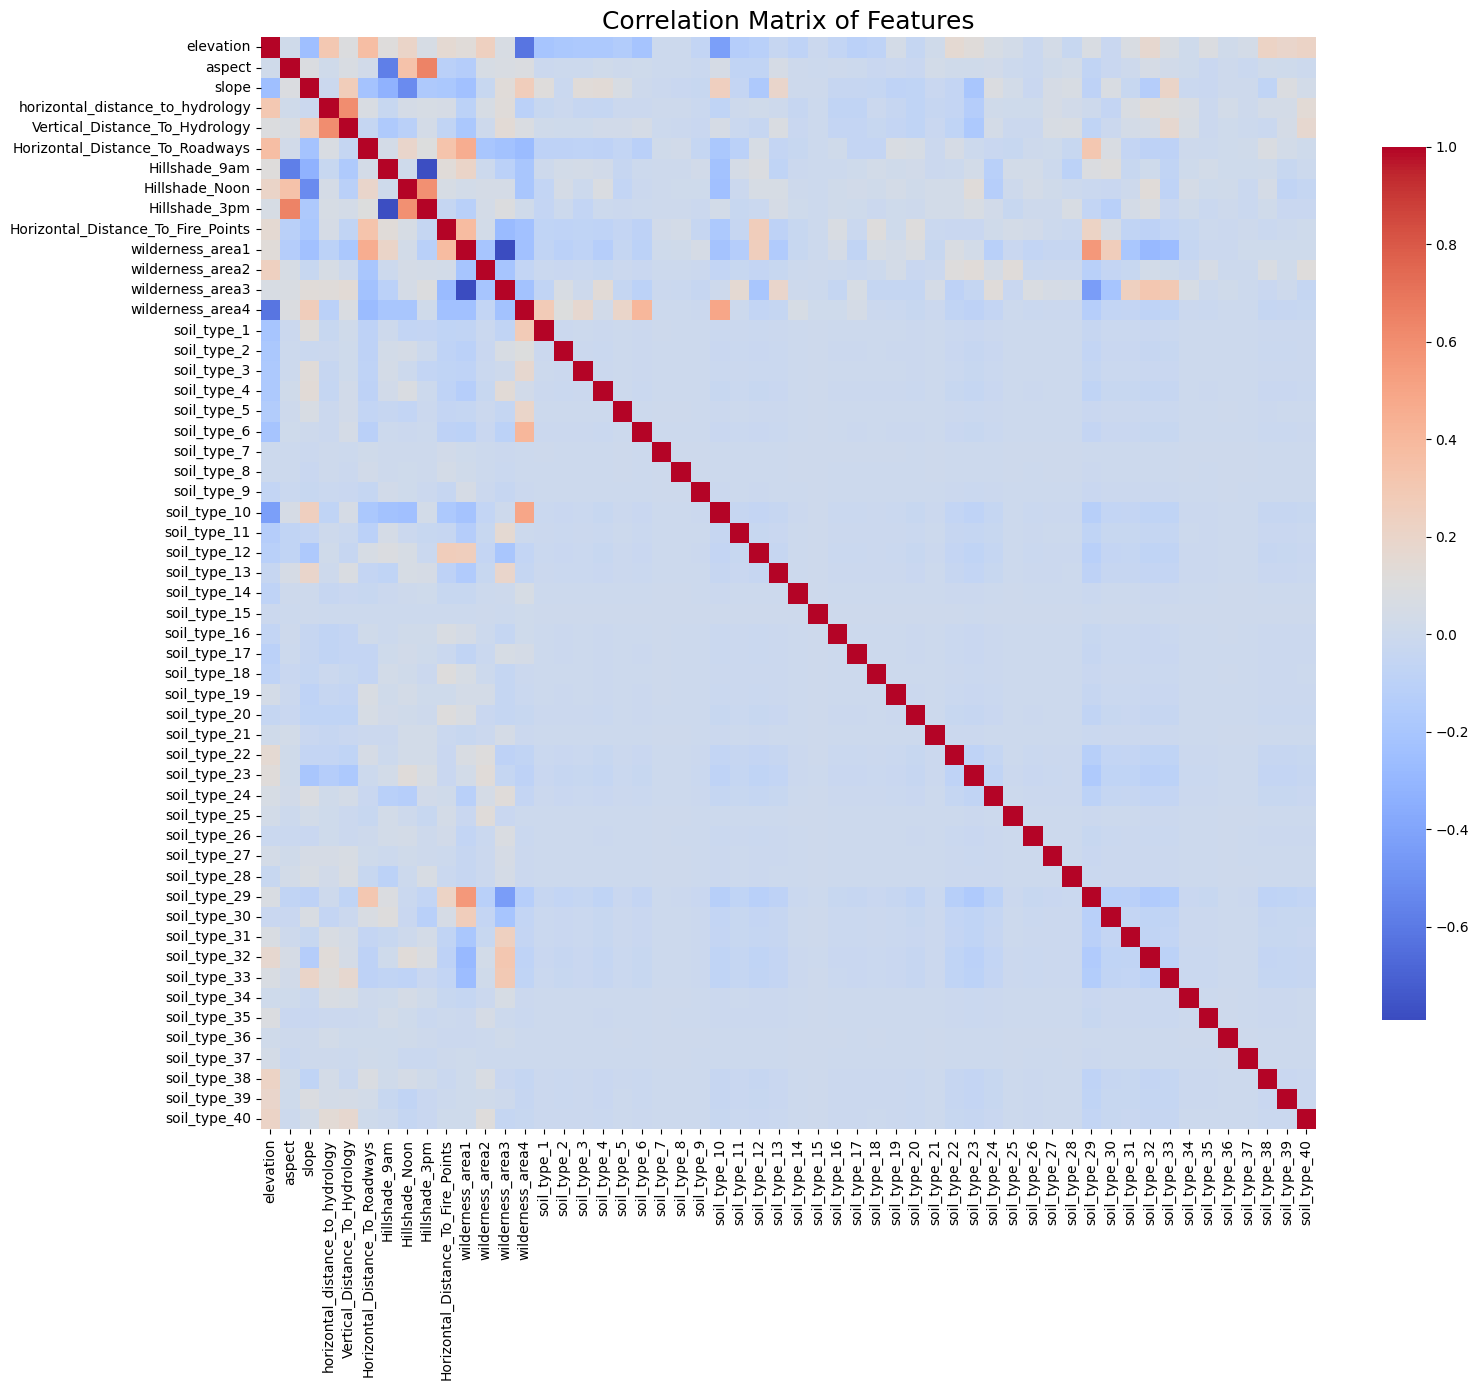

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is defined
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Exploratory Data Analysis (Correlation Matrix)**

The **correlation matrix** displayed provides an overview of the relationships between the features in the dataset, with values ranging from -1 to 1. High positive values (closer to 1, in red) indicate a strong positive correlation between features, while high negative values (closer to -1, in blue) indicate a strong negative correlation. Values near zero (in light colors) suggest minimal or no linear relationship between features.

### Key Observations:

1. **Diagonal Dominance**: The matrix's diagonal shows a perfect correlation of each feature with itself (1.0), marked in dark red, as expected.
2. **Feature Correlation**: Some features have visible correlations, particularly the elevation, slope, and distance-related features (`horizontal_distance_to_hydrology`, `vertical_distance_to_hydrology`, etc.), which likely reflect the geographic nature of the data.
3. **Minimal Correlation Among Soil Types**: Most of the `soil_type` features show weak correlations with each other, indicating that they are relatively independent. This is expected as each `soil_type` is likely a categorical indicator rather than a continuous variable.
4. **Wilderness Areas**: The `wilderness_area` features also show minimal correlation, suggesting that each area is treated as an independent binary indicator without strong linear dependencies with other wilderness areas.

# Partial Dependence Plot (PDP)

A Partial Dependence Plot (PDP or PD) shows the marginal effect one or two features have on the predicted outcome of a model [Paper, 2001](https://jerryfriedman.su.domains/ftp/trebst.pdf)

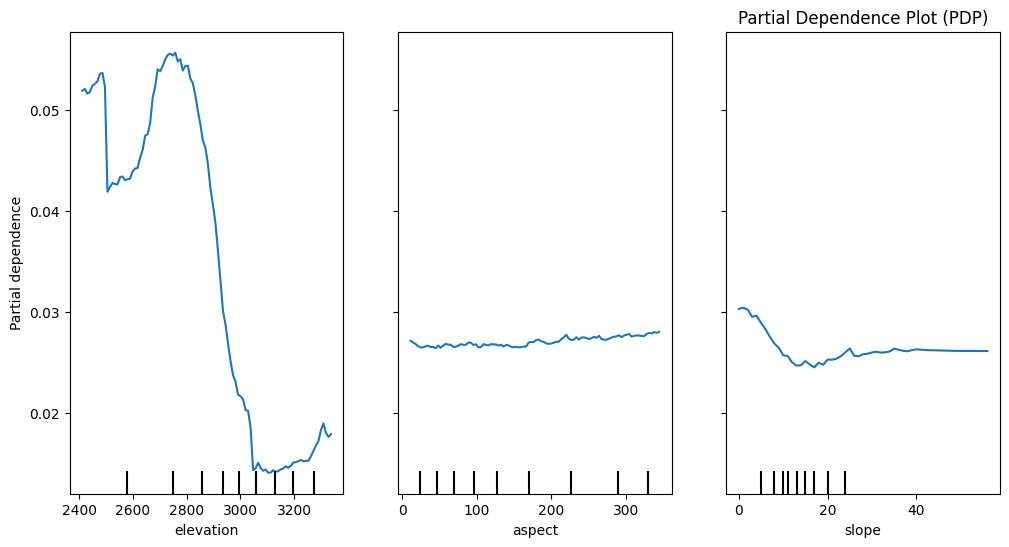

In [67]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

features = ['elevation', 'aspect','slope']  # Selected features for visualization


target_class_index = 0

# PDP plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        features,
                                        kind="average",
                                        ax=ax,
                                        target=model.classes_[target_class_index])  # Specify target class
plt.title('Partial Dependence Plot (PDP)')
plt.show()

**Partial Dependence Plots (PDP)**

The **Partial Dependence Plots (PDP)** illustrate the marginal effect of selected features—**elevation**, **aspect**, and **slope**—on the model's predicted probability of the target outcome while averaging out the effects of other features.

#### Key Observations:

1. **Elevation**: The partial dependence plot for elevation shows a strong, non-linear relationship. Predictions increase slightly as elevation rises initially, but after a certain threshold (~2800), the probability sharply decreases. This suggests that elevation is a significant factor, with lower elevations generally associated with higher predicted probabilities for the target class.

2. **Aspect**: The aspect feature appears to have little to no effect on the prediction, as the line remains almost flat. This implies that changes in aspect (the compass direction the slope faces) do not substantially impact the model's predictions.

3. **Slope**: The PDP for slope shows a mild effect, with a slight decrease in prediction probability as slope increases, but the effect is much less pronounced compared to elevation. This indicates that slope has a small, potentially linear impact on the target class probability.


# Individual Conditional Expectation (ICE) Plot

Individual Conditional Expectation (ICE) plots one line per instance that displays how the instance’s prediction changes when a feature changes [Paper, 2014](https://arxiv.org/pdf/1309.6392)

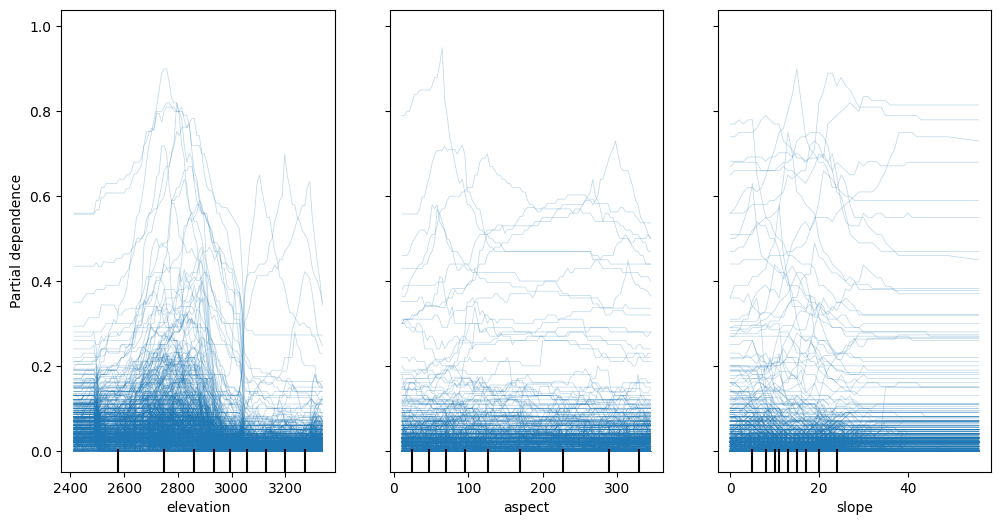

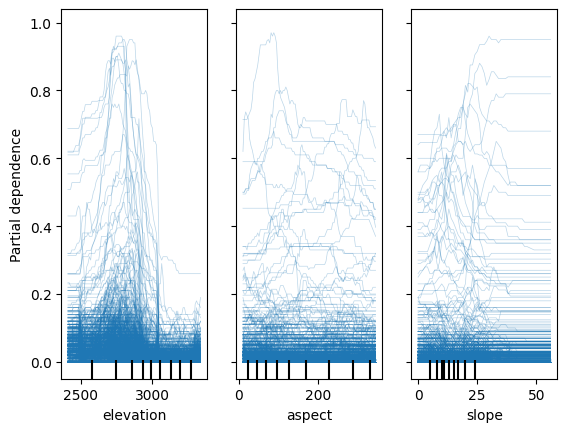

In [71]:
features = ['elevation', 'aspect','slope']  # Selected features for visualization
target_class_index = 0

# Create a new figure and axes for the ICE plot
fig, ax = plt.subplots(figsize=(12, 6)) # Create a new figure and axes

# Use PartialDependenceDisplay to display the ICE plot
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features,
    kind='individual',
    target=model.classes_[target_class_index]
)  # kind='individual'

display.plot(ax=ax) # Plot on the newly created axes

plt.show()

#### Key Observations:
The **Individual Conditional Expectation (ICE) plots** show the impact of each feature—**elevation**, **aspect**, and **slope**—on the model’s predictions for individual data points, revealing how predictions vary across different instances.

1. **Elevation**:
   - The ICE plot for elevation shows that individual predictions rise as elevation increases up to a peak around 2800–3000. After this point, predictions drop sharply.
   - This suggests that the model assigns higher prediction probabilities to some target class at mid-elevations and lower probabilities at both lower and higher elevations.
   - The variation in the lines shows different responses for each instance, though most follow a similar trend.

2. **Aspect**:
   - The ICE plot for aspect is relatively flat, indicating that the model’s predictions are mostly unaffected by changes in aspect.
   - This suggests that the direction the slope faces (aspect) has minimal influence on predictions.
   - The slight variations among individual lines indicate minor differences in prediction responses across instances.

3. **Slope**:
   - The ICE plot for slope indicates a mild effect, with a slight drop in predictions as slope increases. However, the effect is less pronounced compared to elevation.
   - Most instances show relatively small changes in predictions with varying slope, suggesting a weak influence of slope on the model's output.
   - The lines are somewhat scattered, reflecting moderate variation across instances.


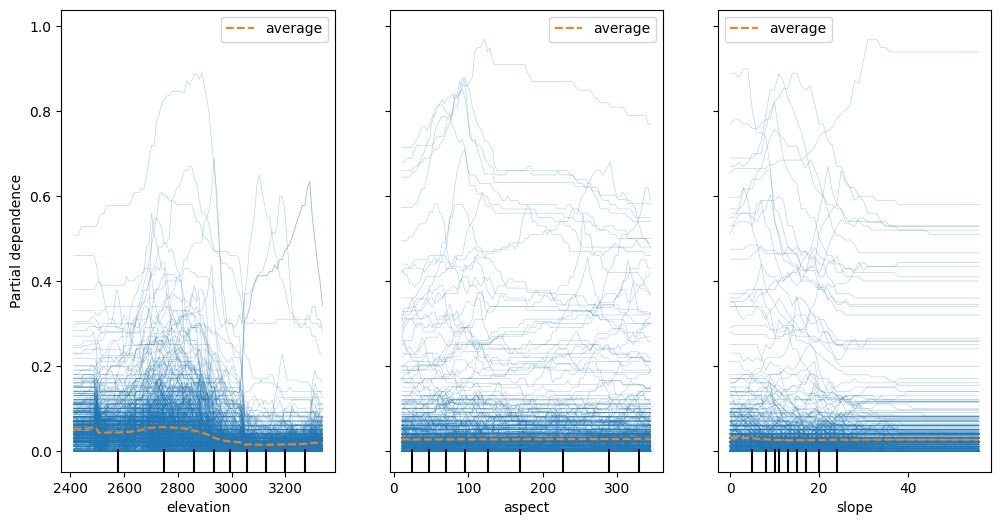

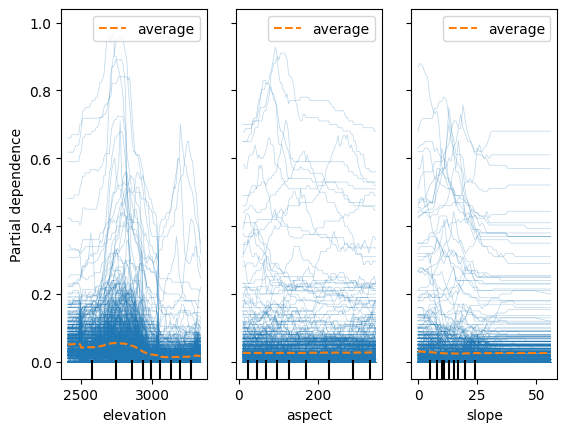

In [72]:
features = ['elevation', 'aspect','slope']  # Selected features for visualization
target_class_index = 0

# Create a new figure and axes for the ICE plot
fig, ax = plt.subplots(figsize=(12, 6)) # Create a new figure and axes

# Use PartialDependenceDisplay to display the ICE plot
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features,
    kind='both',
    target=model.classes_[target_class_index]
)  # kind='both'

display.plot(ax=ax) # Plot on the newly created axes

plt.show()

When the ICE plots for each feature are viewed alongside the **average trend (PDP)**, they reveal both individual and global patterns in feature impact:

- **Elevation**: The combined plot shows a strong global trend (PDP) where predictions peak at mid-elevations and decline at higher elevations. This global trend aligns with the individual ICE lines, which mostly follow this pattern with some variability.
- **Aspect**: The PDP line for aspect remains flat, consistent with the ICE lines, confirming that aspect has minimal influence on predictions.
- **Slope**: The PDP line for slope is also relatively flat, indicating that, on average, slope has a limited effect on predictions, though individual lines show slight variation.

The ICE plots highlight how individual data points respond differently to changes in each feature, while the PDP overlay provides the average trend. The **elevation** feature shows a clear and significant impact on model predictions, while **aspect** and **slope** have much smaller effects. The ICE plots confirm that elevation is an influential factor, while aspect and slope are relatively unimportant across instances. This analysis provides insight into how features individually and collectively affect the model’s decision-making process.

# Accumulated Local Effects (ALE) Plot

The **ALE plot** for **MedInc** further confirms a strong positive relationship, but unlike PDP, it focuses on local feature contributions. It reveals that at lower income levels, changes in income have a smaller effect, while higher income levels see a sharper increase in predicted prices. The ALE is robust to correlated features and highlights localized effects of `MedInc` more clearly.

In [25]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-ycy7qi_p/alepython_85ee96440f95448db5ccc18b888425a1
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-ycy7qi_p/alepython_85ee96440f95448db5ccc18b888425a1
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


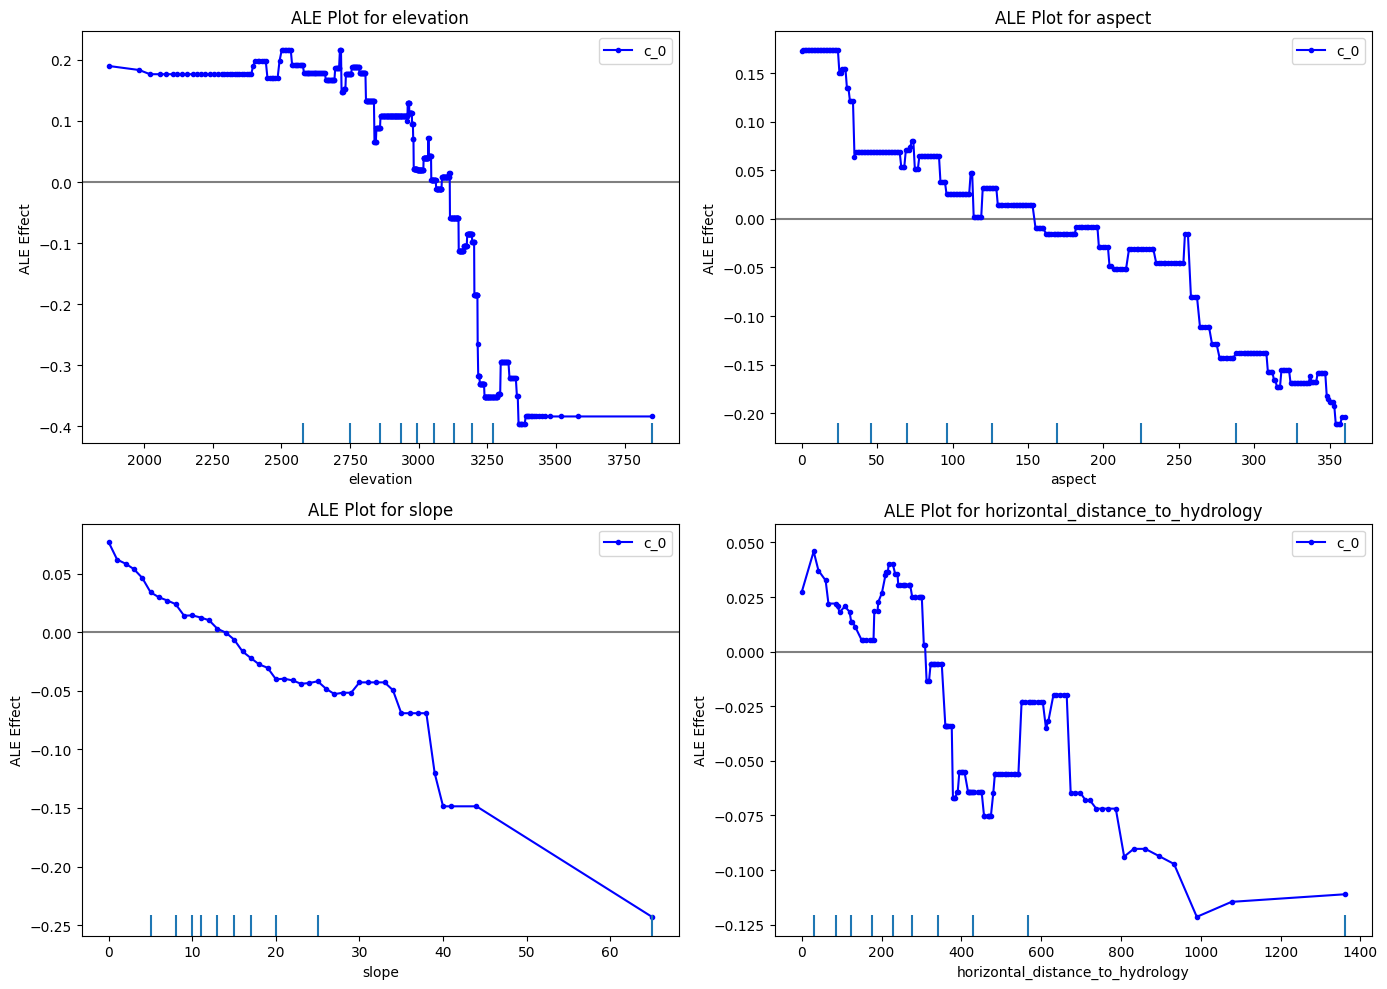

In [29]:
from alibi.explainers import ALE, plot_ale  # Import plot_ale
import matplotlib.pyplot as plt
import pandas as pd

# Train a Random Forest model if not already trained (using previous train-test split)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Initialize the ALE explainer with the trained model and feature names
ale = ALE(clf.predict, feature_names=X_train.columns.tolist())

# Compute ALE for specific features, e.g., 'elevation' (index 0), 'aspect' (index 1)
ale_explanation = ale.explain(X_train.values, features=[0, 1, 2, 3])

# Plot ALE for each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust subplot layout if needed
axes = axes.flatten()

for i, feature in enumerate(ale_explanation.feature_names):
    ax = axes[i]
    # Use plot_ale function instead of ale.plot
    plot_ale(ale_explanation, features=[i], ax=ax, line_kw={'color': 'blue'})
    ax.set_title(f"ALE Plot for {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("ALE Effect")

plt.tight_layout()
plt.show()

The **Accumulated Local Effects (ALE) plots** illustrate the marginal impact of four features—**elevation**, **aspect**, **slope**, and **horizontal_distance_to_hydrology**—on the model's predictions. ALE plots are advantageous as they capture both **local and global feature effects**, helping us understand how each feature affects predictions while accounting for feature dependencies.

#### Key Observations:

1. **Elevation**:
   - The ALE plot for elevation shows a clear, non-linear effect. Predictions increase as elevation rises initially, then sharply decrease around the 3000 mark.
   - This suggests that mid-elevations are associated with higher predicted probabilities, while very high elevations lower them significantly.

2. **Aspect**:
   - The aspect feature has a gradual, downward trend in its ALE plot, indicating a small but consistent negative effect on predictions as aspect increases.
   - This implies that the model slightly favors certain directions (lower aspect values) over others, although the impact is not as strong as elevation.

3. **Slope**:
   - The slope feature shows a decreasing effect on the predictions, with ALE values declining as slope increases.
   - This indicates that flatter areas (lower slope values) are associated with higher predicted probabilities, whereas steep slopes reduce prediction values.

4. **Horizontal Distance to Hydrology**:
   - The ALE plot for horizontal distance to hydrology fluctuates initially, suggesting a complex relationship with the target variable. After a certain distance (~300), the effect becomes negative and more consistent.
   - This indicates that proximity to water sources (lower distance values) may have a positive influence on predictions, while being farther away generally decreases the prediction probability.



## Second Order ALE Plot

In [33]:
# Cannot execute from ALEPython.git@dev#egg=alepython
# from alepython import ale_plot
# # ALE plots
# ale_plot(model, X_train, 'elevation', monte_carlo=True)

In [35]:
# ale_plot(model, X_train, 'aspect', monte_carlo=True)

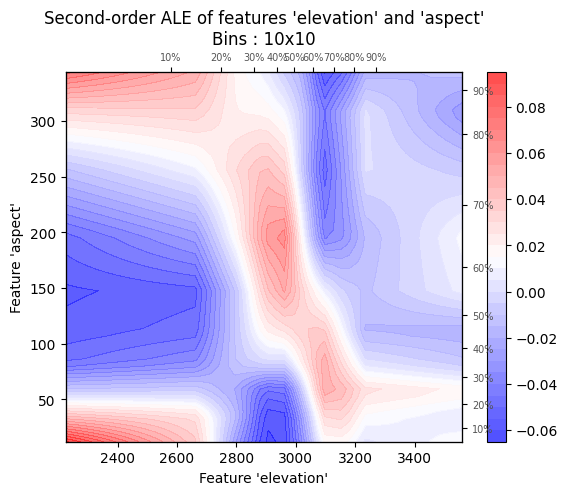

<Axes: title={'center': "Second-order ALE of features 'elevation' and 'aspect'\nBins : 10x10"}, xlabel="Feature 'elevation'", ylabel="Feature 'aspect'">

In [31]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, X_train.columns[:2], bins=10)

This **second-order ALE plot** shows the interaction effect between **elevation** and **aspect** on the model's predictions. In a second-order ALE plot, the color gradient and contour lines represent how the combined values of two features affect the predicted outcome. Here, red areas indicate a positive effect on predictions, while blue areas indicate a negative effect.

#### Key Observations:

1. **Elevation as Primary Influence**:
   - The most noticeable changes in prediction values occur along the **elevation** axis. Predictions are highest in the mid-elevation range (around 2800) and decrease significantly at lower and higher elevations, consistent with the first-order ALE plot for elevation.
   - This suggests that elevation has a dominant influence on the model's predictions, with mid-range elevations associated with higher prediction probabilities.

2. **Aspect Influence**:
   - The **aspect** feature shows a more subtle effect, with some slight variations based on direction, though its influence is secondary to elevation.
   - The plot indicates that, at lower elevations, a lower aspect (below 100) is associated with a positive prediction effect. As elevation increases, the influence of aspect becomes less pronounced.

3. **Interaction Between Elevation and Aspect**:
   - The interaction effect is evident in the plot, with distinct regions where aspect moderates the influence of elevation. For instance, at higher elevations, aspect values above 200 tend to have a more negative effect, indicated by the blue areas.
   - This interaction suggests that certain combinations of mid-elevation and specific aspect directions (lower aspect values) lead to higher predictions, while other combinations reduce the prediction probability.

# **Comparison of PDP and ALE**

#### **PDP (Partial Dependence Plot)**
- **Global view**: The PDP provides a global perspective on how each feature impacts the model’s predictions, averaged across all instances. For example, the PDP for **elevation** shows a strong non-linear effect, where predictions increase at mid-elevation levels and then sharply decline at higher elevations. This global trend highlights elevation’s general influence on the model.
- **Insights**: PDP smooths out individual variations and interactions, giving a clean but simplified view of feature importance and trends. It is useful for understanding broad relationships, though it may not capture finer, localized details, especially in correlated features.

#### **ALE (Accumulated Local Effects)**
- **Local and interaction-aware**: ALE provides a more refined view by focusing on the local contribution of each feature to predictions, taking feature interactions into account. For example, the ALE plot for **elevation** shows similar trends to the PDP but captures more nuanced effects at specific elevation intervals, such as sharper drops beyond a certain elevation range.
- **Second-order effects**: The second-order ALE plot, which captures the interaction between **elevation** and **aspect**, reveals that elevation’s impact is moderated by aspect, showing distinct zones where specific combinations of these features produce different effects on predictions.

#### **Key Differences**:
- **PDP** offers a simplified, global interpretation by averaging feature effects across the dataset. It does not account for feature correlations, which may lead to over- or underestimating the true effect of a feature, particularly in datasets with interdependent variables.
- **ALE**, by contrast, corrects for feature dependencies by evaluating effects within local intervals, resulting in a more accurate and detailed interpretation. ALE is especially useful in datasets with correlated features, as it reveals both first-order (individual) and second-order (interaction) effects.

**PDP** for `elevation` shows a smooth trend across the entire feature range, while **ALE** captures localized variations, such as the rapid decline in predictions at higher elevations and interaction effects with **aspect**. This makes ALE more suitable for understanding complex, non-linear relationships in the model.

# Permutation Feature Importance

The importance of a feature can be measured by calculating how much model’s prediction error increases after permuting the feature.
* If shuffling a feature’s values increases the model error, the feature is important
* If the model error doesn’t change after shuffling a feature’s values, a feature is considered unimportant

First introduced for random forests [Paper, 2001](https://link.springer.com/article/10.1023/A:1010933404324). Updated to be model agnostic - renamed “model reliance” [Paper, 2018](https://arxiv.org/abs/1801.01489).


In [37]:
from sklearn.inspection import permutation_importance
# Compute permutation importances
perm_imp = permutation_importance(model, X_test, y_test,
                           n_repeats=10,
                           random_state=42)

In [38]:
# Print the mean and standard deviation of permutation importances for each feature

for i in perm_imp.importances_mean.argsort()[::-1]:
    if perm_imp.importances_mean[i] - 2 * perm_imp.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
              f"{perm_imp.importances_mean[i]:.3f}"
              f" +/- {perm_imp.importances_std[i]:.3f}")

elevation0.287 +/- 0.002
Horizontal_Distance_To_Roadways0.090 +/- 0.001
Horizontal_Distance_To_Fire_Points0.065 +/- 0.001
horizontal_distance_to_hydrology0.029 +/- 0.001
soil_type_290.017 +/- 0.001
Vertical_Distance_To_Hydrology0.017 +/- 0.001
wilderness_area10.015 +/- 0.001
soil_type_220.014 +/- 0.001
soil_type_230.012 +/- 0.000
Hillshade_Noon0.010 +/- 0.001
aspect  0.010 +/- 0.001
soil_type_100.010 +/- 0.000
wilderness_area40.010 +/- 0.000
soil_type_40.010 +/- 0.000
wilderness_area30.009 +/- 0.001
soil_type_320.008 +/- 0.000
Hillshade_9am0.006 +/- 0.001
soil_type_390.006 +/- 0.000
soil_type_20.006 +/- 0.000
soil_type_380.005 +/- 0.000
slope   0.004 +/- 0.001
soil_type_130.004 +/- 0.000
soil_type_330.004 +/- 0.000
soil_type_240.003 +/- 0.000
wilderness_area20.003 +/- 0.000
soil_type_300.002 +/- 0.000
soil_type_120.002 +/- 0.000
soil_type_310.002 +/- 0.000
Hillshade_3pm0.002 +/- 0.001
soil_type_110.002 +/- 0.000
soil_type_170.002 +/- 0.000
soil_type_200.001 +/- 0.000
soil_type_30.001 +

In [45]:
sorted_idx = perm_imp.importances_mean.argsort()

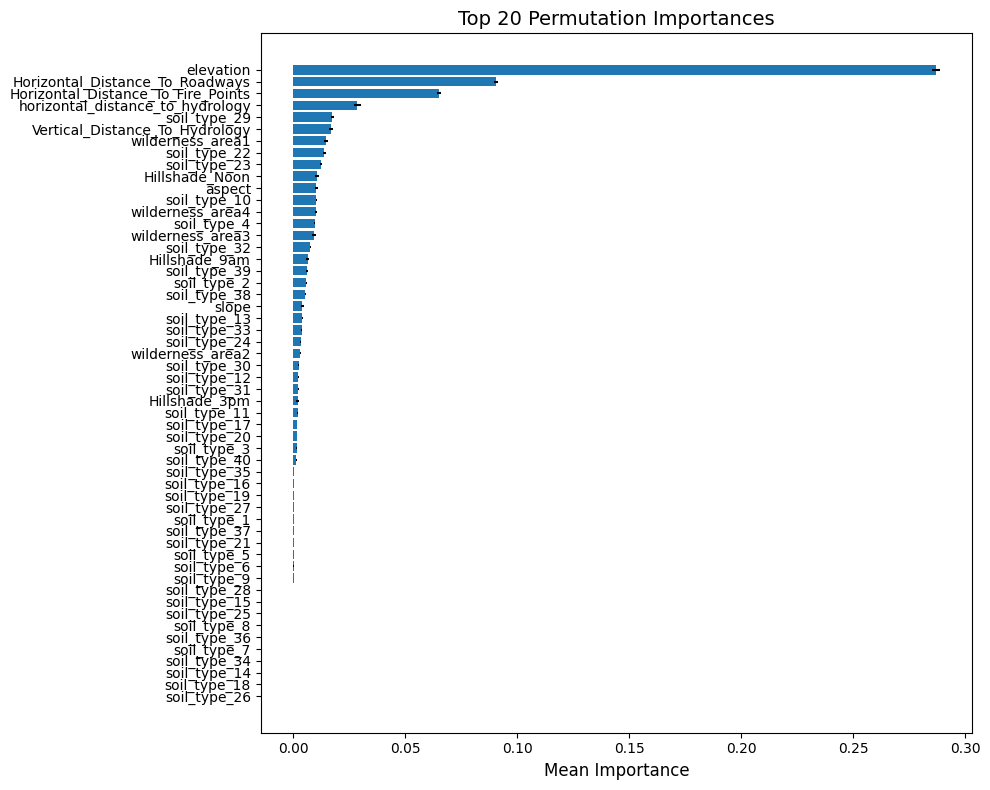

In [43]:
# Plot Permutation Feature Importances as a bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size for readability
ax.barh([X_test.columns[i] for i in sorted_idx], perm_imp.importances_mean[sorted_idx], xerr=perm_imp.importances_std[sorted_idx])
ax.set_title("Top 20 Permutation Importances", fontsize=14)
ax.set_xlabel("Mean Importance", fontsize=12)
fig.tight_layout()
plt.show()

#### Bar Chart of Permutation Feature Importance
- **Interpretation**: This bar chart shows the mean importance scores for the top 20 features, with error bars indicating variability across multiple shuffles.
- **Key Findings**: The feature **elevation** has the highest impact on predictions by a large margin, followed by **Horizontal Distance to Roadways** and **Horizontal Distance to Fire Points**. Features such as **soil type** and **wilderness area** also contribute, but to a lesser extent.
- **Insights**: This ranking highlights the significance of geographic features like elevation and proximity to roads or fire points in determining the model's predictions, suggesting that physical and spatial attributes strongly influence the target variable.

In [46]:
# Permutation Feature Importance
perm_importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

In [47]:
sorted_idx = perm_importances.importances_mean.argsort()

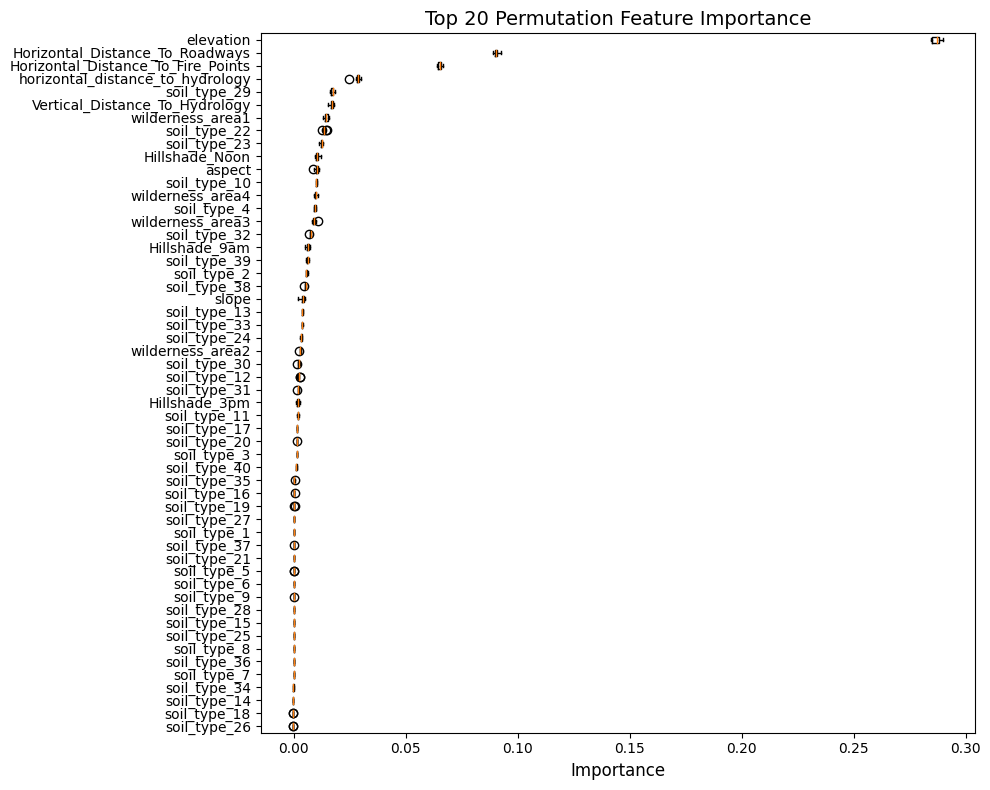

In [44]:
# Plot Permutation Feature Importance as a box plot
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size for readability
ax.boxplot(perm_importances.importances[sorted_idx].T, vert=False, labels=[X_test.columns[i] for i in sorted_idx])
ax.set_title("Top 20 Permutation Feature Importance", fontsize=14)
ax.set_xlabel("Importance", fontsize=12)
fig.tight_layout()
plt.show()

#### Box Plot of Permutation Feature Importance
- **Interpretation**: This box plot presents the distribution of importance values across multiple iterations, providing insight into the stability of each feature’s importance.
- **Key Findings**: **Elevation** remains the most influential feature with a relatively stable importance score, indicated by the narrow spread of values. Some features, like **Horizontal Distance to Fire Points**, show more variability, suggesting that their importance fluctuates slightly across permutations.
- **Insights**: The box plot format helps identify features with consistent importance (e.g., elevation) and those with more variability (e.g., soil types). This insight is crucial for understanding which features provide stable predictive power versus those that may vary depending on model conditions.




These **Permutation Feature Importance** plots rank the importance of the top 20 features in predicting the target variable. The importance values are derived by randomly shuffling each feature and observing the impact on model performance, with larger values indicating a greater influence on predictions. The two plots display the same information using different visualization styles.

# Model Performance

To evaluate the performance of your **Random Forest** model, we can compute **R² (coefficient of determination)** and **Mean Squared Error (MSE)** on the test set.

These metrics will provide a measure of how well the model generalizes:
- **R²** quantifies the proportion of variance in the target explained by the model (1 indicates perfect fit).
- **MSE** measures the average squared difference between predicted and actual values.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")

R²: 0.488
MSE: 0.953


The **Random Forest model** showed the model's performance, as indicated by an R² score of 0.488 and a Mean Squared Error (MSE) of 0.953, suggests moderate predictive capability. The R² score of 0.488 implies that the model explains approximately 48.8% of the variance in the target variable, meaning that just under half of the variability in predictions is captured by the model. The MSE value of 0.953 indicates the average squared difference between predicted and actual values, with lower values generally indicating better performance. While the model captures some patterns in the data, the results suggest there is room for improvement, potentially through feature engineering, hyperparameter tuning, or trying alternative algorithms to better capture the complexity of the target variable.

### Limitations
- **Model Accuracy**: The R² score of 0.488 indicates that the model captures only about 48.8% of the variance, suggesting limited predictive accuracy. This may be due to missing complex interactions or nonlinear relationships in the data.
- **Feature Dependence**: The model relies heavily on specific features (e.g., elevation) as shown in the feature importance analysis, which could lead to overfitting if these features are not representative across diverse samples.
- **Lack of Interaction Effects**: While partial dependence plots (PDP) and accumulated local effects (ALE) capture some interactions, the model may still lack a full representation of feature interdependencies, which could be important for this dataset.
- **Limited Data Preprocessing**: Some features, particularly categorical ones (e.g., soil type, wilderness area), may not have been fully optimized or transformed, which could limit the model’s predictive power.
- **Single Model Approach**: Only one model type (e.g., Random Forest) was used, which may not be the most suitable for this dataset. Trying other algorithms could yield better performance.


### Future Works
- **Explore Advanced Models**: Experiment with more complex algorithms such as Gradient Boosting Machines, XGBoost, or neural networks to capture non-linear relationships and interactions more effectively.
- **Feature Engineering**: Enhance feature engineering efforts, particularly for categorical variables, and explore creating new features that capture interactions between geographic and environmental variables.
- **Hyperparameter Tuning**: Perform extensive hyperparameter tuning, possibly using cross-validation or grid search, to optimize model performance.


# Conclusion
Based on the analysis of geographic and environmental features in predicting forest cover type, key insights were derived using **Permutation Feature Importance**, **PDP**, **ICE**, and **ALE** plots on the **Forest Cover dataset**.

**Elevation** emerged as the most influential variable, with mid-range elevations associated with higher predicted probabilities for certain cover types, while extreme elevations reduced the likelihood. **Horizontal distance to roadways** and **proximity to hydrological features** also showed significant importance, indicating the model's reliance on spatial attributes. **PDP** provided a broad, smooth perspective on feature effects, while **ALE** captured more detailed, localized interactions, especially when examining joint effects such as between **elevation** and **aspect**.

Explainability techniques like **PDP** and **ALE** offer complementary insights, with PDPs capturing global trends and ALE accounting for local variations and feature dependencies. These tools enhance interpretability, guiding future improvements in model accuracy and reliability for forest cover classification tasks.

# References

- Google Colaboratory. (n.d.). Explainable AI - Global Explanations Notebook. Google Colab. https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=iR-WV8-fVkDS&uniqifier=1
- Google Colaboratory. (n.d.). Explainable AI - Local Explanations Notebook. Google Colab. https://colab.research.google.com/drive/1aBZSreILCbF3x7f5PIIlA3eNTmxoyzL7#scrollTo=ASXFH-S88xMp&uniqifier=1
